In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
            

In [3]:
df = pd.read_csv("sales_data.csv")

In [6]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [8]:
# Convert 'Date' to DateTime format
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate sales by date
sales_data = df.groupby('Date')['Total Revenue'].sum().reset_index()



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


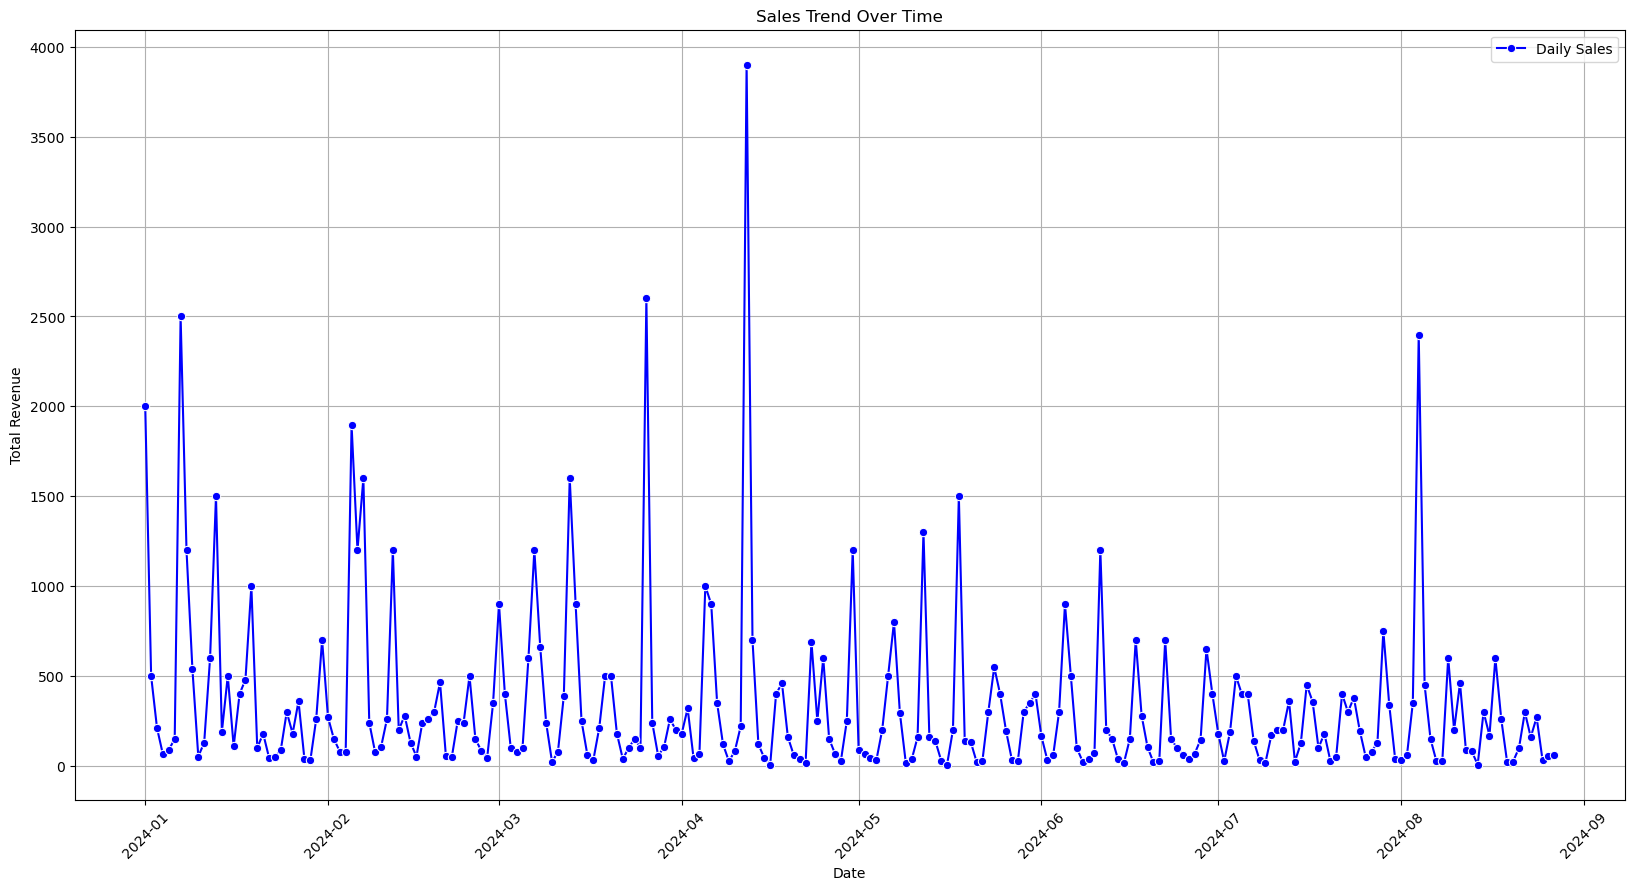

In [10]:
# Plot sales trend
plt.figure(figsize=(20, 10))
sns.lineplot(x='Date', y='Total Revenue', data=sales_data, marker='o', color='b', label="Daily Sales")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Set 'Date' as index for time series analysis
sales_data.set_index('Date', inplace=True)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[:train_size], sales_data[train_size:]

# Fit ARIMA model (choosing ARIMA(5,1,0) as a starting point)
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))

# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast) * 100

rmse, mape


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


(361.4448377548323, 189.50472332339874)

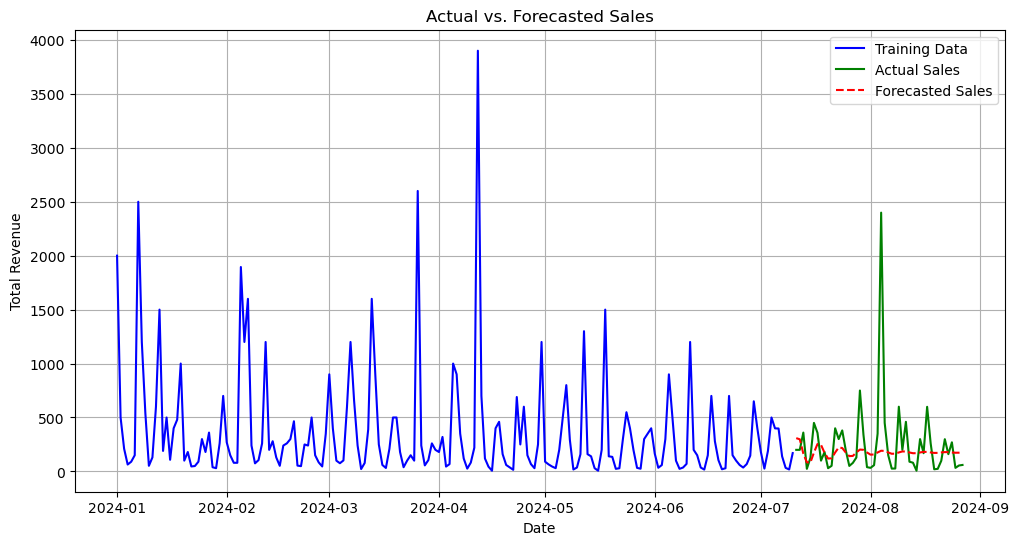

In [12]:
# Plot actual vs. forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Total Revenue'], label="Training Data", color="blue")
plt.plot(test.index, test['Total Revenue'], label="Actual Sales", color="green")
plt.plot(test.index, forecast, label="Forecasted Sales", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.title("Actual vs. Forecasted Sales")
plt.legend()
plt.grid()
plt.show()


In [13]:
# Create a DataFrame with actual and forecasted sales
forecast_df = pd.DataFrame({
    'Date': test.index,
    'Actual Sales': test['Total Revenue'].values,
    'Forecasted Sales': forecast.values
})

# Display the first few rows of forecasted data
forecast_df.head()


,Date,Actual Sales,Forecasted Sales
0,2024-07-11,199.99,308.623662
1,2024-07-12,199.95,297.669792
2,2024-07-13,359.98,166.160571
3,2024-07-14,23.98,84.520133
4,2024-07-15,125.00,82.912745


### Summary

The sales data analysis revealed fluctuations over time, suggesting possible seasonality and irregularities. Using the ARIMA(5,1,0) model, we forecasted future sales, splitting the data into training and testing sets for validation. The model's performance metrics showed an RMSE of 361.44 and a MAPE of 189.50%, indicating a significant forecasting error. While the model captured overall trends, deviations from actual sales suggest that improvements are needed. To enhance accuracy, alternative models like SARIMA, XGBoost, or LSTMs could be explored, along with further tuning of ARIMA parameters.